# WSU Impact Assessment Examples

This notebook provides examples of some calculations that can be done using the data bases estimating the properties of WSU data based on current data taken in cycles 7 and 8. This data base does NOT include data from Band 1 and Band 2, which will be the most challenging use cases because they are the lowest frequencies

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.table import QTable, vstack
from importlib import reload
import re
import large_cubes

## Read in files

Reading in using ecsv and QTable is recommended to get unit information. You can use the vstack function to stack tables if desired. The tables can also be converted to pandas data tables.

In [2]:
result_c7_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle7_20230128.ecsv')
result_c8_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle8_20230128.ecsv')

In [3]:
# fix up custom units
gvis = u.def_unit('Gvis',namespace=globals())
u.add_enabled_units([gvis])

Take a look at the tables. Note that the values that should have units do have units indicated.

In [4]:
result_c7_mous

mous,proposal_id,schedblock_name,array,nant_typical,nant_array,nant_all,band,ntarget,s_fov,s_resolution,mosaic,imsize,pb,cell,blc_npol,blc_nspw,blc_specwidth,blc_freq,blc_velres,blc_nchan_agg,blc_nchan_max,blc_bandwidth_max,blc_bandwidth_agg,wsu_freq,wsu_npol,wsu_bandwidth_early,wsu_bandwidth_later_2x,wsu_bandwidth_later_4x,wsu_bandwidth_spw,wsu_nspw_early,wsu_nspw_later_2x,wsu_nspw_later_4x,wsu_specwidth_finest,wsu_chanavg_finest,wsu_velres_finest,wsu_specwidth_stepped,wsu_chanavg_stepped,wsu_velres_stepped,wsu_specwidth_stepped2,wsu_chanavg_stepped2,wsu_velres_stepped2,wsu_tint,wsu_nchan_spw_finest,wsu_nchan_spw_stepped,wsu_nchan_spw_stepped2,wsu_frac_bw_early,wsu_frac_bw_later_2x,wsu_frac_bw_later_4x,wsu_frac_bw_spw,nbase_typical,nbase_array,nbase_all,L80,Project,SB_name,blc_tint,blc_ntunings,bp_time,flux_time,phase_time,pol_time,check_time,target_time_tot,time_tot,cal_time,mfssize,wsu_cubesize_stepped2,wsu_productsize_early_stepped2,wsu_datarate_early_stepped2_typical,wsu_visrate_early_stepped2_typical,wsu_datavol_early_stepped2_typical_target_tot,wsu_datavol_early_stepped2_typical_cal,wsu_datavol_early_stepped2_typical_total,wsu_nvis_early_stepped2_typical_target_tot,wsu_nvis_early_stepped2_typical_cal,wsu_nvis_early_stepped2_typical_total,wsu_productsize_later_2x_stepped2,wsu_datarate_later_2x_stepped2_typical,wsu_visrate_later_2x_stepped2_typical,wsu_datavol_later_2x_stepped2_typical_target_tot,wsu_datavol_later_2x_stepped2_typical_cal,wsu_datavol_later_2x_stepped2_typical_total,wsu_nvis_later_2x_stepped2_typical_target_tot,wsu_nvis_later_2x_stepped2_typical_cal,wsu_nvis_later_2x_stepped2_typical_total,wsu_productsize_later_4x_stepped2,wsu_datarate_later_4x_stepped2_typical,wsu_visrate_later_4x_stepped2_typical,wsu_datavol_later_4x_stepped2_typical_target_tot,wsu_datavol_later_4x_stepped2_typical_cal,wsu_datavol_later_4x_stepped2_typical_total,wsu_nvis_later_4x_stepped2_typical_target_tot,wsu_nvis_later_4x_stepped2_typical_cal,wsu_nvis_later_4x_stepped2_typical_total,blc_cubesize,blc_cubesize_sum,blc_productsize,blc_datarate_typical,blc_visrate_typical,blc_datavol_typical_target_tot,blc_datavol_typical_cal,blc_datavol_typical_total,blc_nvis_typical_target_tot,blc_nvis_typical_cal,blc_nvis_typical_total,imsize_mit,wsu_cubesize_stepped2_mit,wsu_mfssize_mit,wsu_productsize_early_stepped2_mit,plversion,procedure,nant,pl_totaltime,pl_imgtime,pl_cubetime,pl_aggtime,pl_fctime,nEB,npt,nscan,reptgt,allowedcubesize,allowedcubelimit,predcubesize,mitigatedcubesize,allowedprodsize,initialprodsize,mitigatedprodsize,mitigated,mit_nbins,mit_hm_imsize,mit_hm_cell,mit_field,mit_spw,pl_caltime
,,,,,,,,,deg,arcsec,,,arcsec,arcsec,,,kHz,GHz,km / s,,,GHz,GHz,GHz,,GHz,GHz,GHz,GHz,,,,kHz,,km / s,kHz,,km / s,kHz,,km / s,s,,,,,,,,,,,m,,,s,,s,s,s,s,s,s,s,s,Gbyte,Gbyte,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,,Gbyte,Gbyte,Gbyte,,,,h,h,h,h,h,,,,,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,,,,,,,h
str22,str14,str18,str3,int64,int64,int64,float64,float64,float64,float64,str1,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str14,str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str20,int64,float64,

In [5]:
result_c7_mous.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','bp_time','flux_time','phase_time','pol_time','check_tim

In [6]:
result_c8_mous

mous,proposal_id,schedblock_name,array,nant_typical,nant_array,nant_all,band,ntarget,s_fov,s_resolution,mosaic,imsize,pb,cell,blc_npol,blc_nspw,blc_specwidth,blc_freq,blc_velres,blc_nchan_agg,blc_nchan_max,blc_bandwidth_max,blc_bandwidth_agg,wsu_freq,wsu_npol,wsu_bandwidth_early,wsu_bandwidth_later_2x,wsu_bandwidth_later_4x,wsu_bandwidth_spw,wsu_nspw_early,wsu_nspw_later_2x,wsu_nspw_later_4x,wsu_specwidth_finest,wsu_chanavg_finest,wsu_velres_finest,wsu_specwidth_stepped,wsu_chanavg_stepped,wsu_velres_stepped,wsu_specwidth_stepped2,wsu_chanavg_stepped2,wsu_velres_stepped2,wsu_tint,wsu_nchan_spw_finest,wsu_nchan_spw_stepped,wsu_nchan_spw_stepped2,wsu_frac_bw_early,wsu_frac_bw_later_2x,wsu_frac_bw_later_4x,wsu_frac_bw_spw,nbase_typical,nbase_array,nbase_all,L80,Project,SB_name,blc_tint,blc_ntunings,bp_time,flux_time,phase_time,pol_time,check_time,target_time_tot,time_tot,cal_time,mfssize,wsu_cubesize_stepped2,wsu_productsize_early_stepped2,wsu_datarate_early_stepped2_typical,wsu_visrate_early_stepped2_typical,wsu_datavol_early_stepped2_typical_target_tot,wsu_datavol_early_stepped2_typical_cal,wsu_datavol_early_stepped2_typical_total,wsu_nvis_early_stepped2_typical_target_tot,wsu_nvis_early_stepped2_typical_cal,wsu_nvis_early_stepped2_typical_total,wsu_productsize_later_2x_stepped2,wsu_datarate_later_2x_stepped2_typical,wsu_visrate_later_2x_stepped2_typical,wsu_datavol_later_2x_stepped2_typical_target_tot,wsu_datavol_later_2x_stepped2_typical_cal,wsu_datavol_later_2x_stepped2_typical_total,wsu_nvis_later_2x_stepped2_typical_target_tot,wsu_nvis_later_2x_stepped2_typical_cal,wsu_nvis_later_2x_stepped2_typical_total,wsu_productsize_later_4x_stepped2,wsu_datarate_later_4x_stepped2_typical,wsu_visrate_later_4x_stepped2_typical,wsu_datavol_later_4x_stepped2_typical_target_tot,wsu_datavol_later_4x_stepped2_typical_cal,wsu_datavol_later_4x_stepped2_typical_total,wsu_nvis_later_4x_stepped2_typical_target_tot,wsu_nvis_later_4x_stepped2_typical_cal,wsu_nvis_later_4x_stepped2_typical_total,blc_cubesize,blc_cubesize_sum,blc_productsize,blc_datarate_typical,blc_visrate_typical,blc_datavol_typical_target_tot,blc_datavol_typical_cal,blc_datavol_typical_total,blc_nvis_typical_target_tot,blc_nvis_typical_cal,blc_nvis_typical_total,imsize_mit,wsu_cubesize_stepped2_mit,wsu_mfssize_mit,wsu_productsize_early_stepped2_mit,plversion,procedure,nant,pl_totaltime,pl_imgtime,pl_cubetime,pl_aggtime,pl_fctime,nEB,npt,nscan,reptgt,allowedcubesize,allowedcubelimit,predcubesize,mitigatedcubesize,allowedprodsize,initialprodsize,mitigatedprodsize,mitigated,mit_nbins,mit_hm_imsize,mit_hm_cell,mit_field,mit_spw,pl_caltime
,,,,,,,,,deg,arcsec,,,arcsec,arcsec,,,kHz,GHz,km / s,,,GHz,GHz,GHz,,GHz,GHz,GHz,GHz,,,,kHz,,km / s,kHz,,km / s,kHz,,km / s,s,,,,,,,,,,,m,,,s,,s,s,s,s,s,s,s,s,Gbyte,Gbyte,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,,Gbyte,Gbyte,Gbyte,,,,h,h,h,h,h,,,,,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,,,,,,,h
str22,str14,str26,str3,int64,int64,int64,float64,float64,float64,float64,str1,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str14,str26,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str20,int64,float64,

In [36]:
result_c8_mous.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','bp_time','flux_time','phase_time','pol_time','check_tim

In [9]:
idx = result_c7_mous['mous'] == 'uid://A001/X1465/X1008'
result_c7_mous[idx]['proposal_id','mous','npt','target_time_tot','mosaic']

proposal_id,mous,npt,target_time_tot,mosaic
,,,s,
str14,str22,int64,float64,str1
2019.1.01326.S,uid://A001/X1465/X1008,39,10.08,T


The columns derived from the mitigated data are masked. To access try something like the following:

In [37]:
np.mean(result_c7_mous['predcubesize'].value)

MaskedNDArray(42.00283611)

You may also need to specify a fill value

In [38]:
np.nanmean(result_c7_mous['predcubesize'].value.filled(np.nan))

42.00283611001187

(array([2.413e+03, 4.400e+01, 4.000e+01, 1.200e+01, 6.000e+00, 5.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00]),
 array([2.10000000e-03, 2.83001890e+02, 5.66001680e+02, 8.49001470e+02,
        1.13200126e+03, 1.41500105e+03, 1.69800084e+03, 1.98100063e+03,
        2.26400042e+03, 2.54700021e+03, 2.83000000e+03]),
 <BarContainer object of 10 artists>)

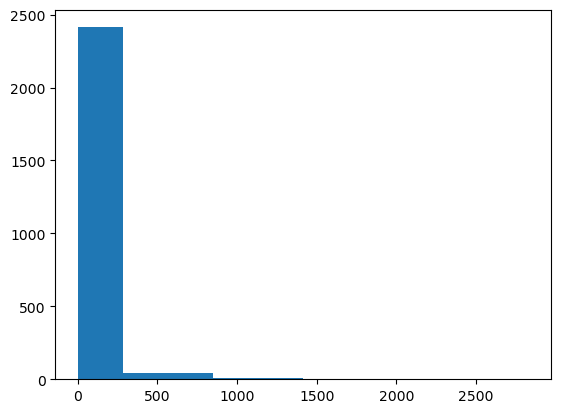

In [39]:
plt.hist(result_c7_mous['predcubesize'].value.filled(np.nan))

## Data properties

Text(0.5, 0, 'log 80th percentile baseline')

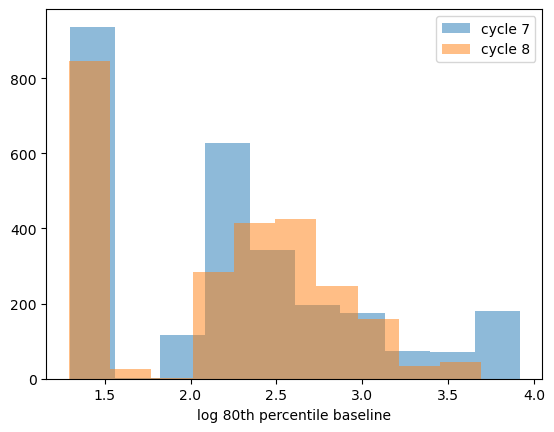

In [40]:
plt.hist(np.log10(result_c7_mous['L80'].value),alpha=0.5,label='cycle 7')
plt.hist(np.log10(result_c8_mous['L80'].value),alpha=0.5, label='cycle 8')
plt.legend()
plt.xlabel('log 80th percentile baseline')

 Cycle 7 included long baselines while cycle 8 did not.


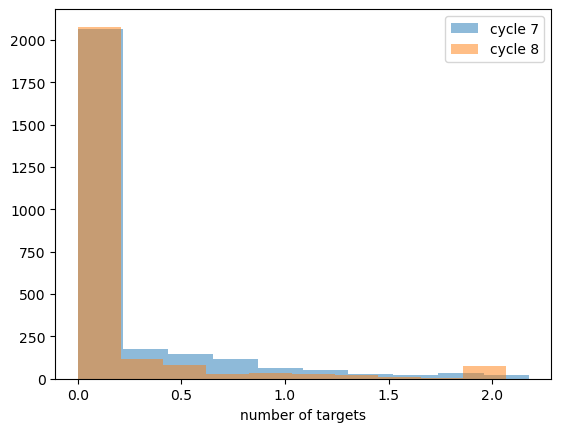

In [41]:
plt.hist(np.log10(result_c7_mous['ntarget']),alpha=0.5, label='cycle 7')
plt.hist(np.log10(result_c8_mous['ntarget']),alpha=0.5,label='cycle 8')
plt.xlabel('number of targets')
plt.legend()

Text(0.5, 0, ' BLC --- number of spectral windows')

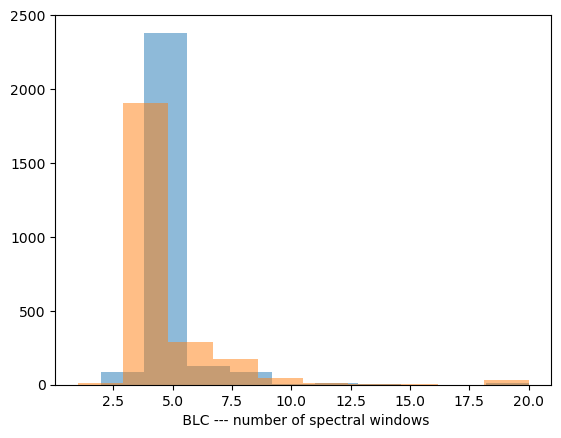

In [42]:
plt.hist(result_c7_mous['blc_nspw'],alpha=0.5,label='cycle 7')
plt.hist(result_c8_mous['blc_nspw'],alpha=0.5,label='cycle 8')
plt.xlabel(' BLC --- number of spectral windows')

Text(0.5, 0, 'BLC Cube size (GB)')

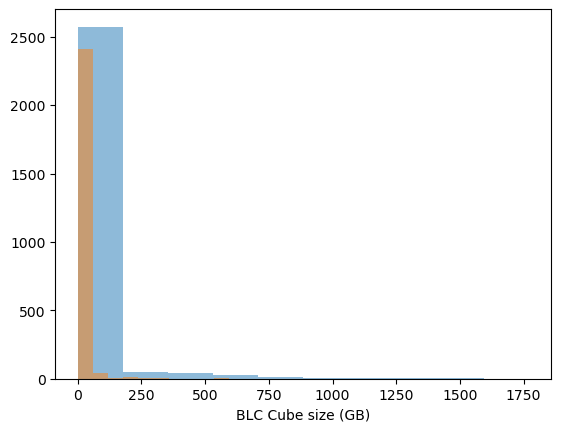

In [43]:
# estimated cube size for blc 
plt.hist(result_c7_mous['blc_cubesize'].value,alpha=0.5, label='cycle 7')
plt.hist(result_c8_mous['blc_cubesize'].value,alpha=0.5, label='cycle 8')

plt.xlabel('BLC Cube size (GB)')

## BLC Data Rates

Text(0.5, 1.0, 'cycle 7')

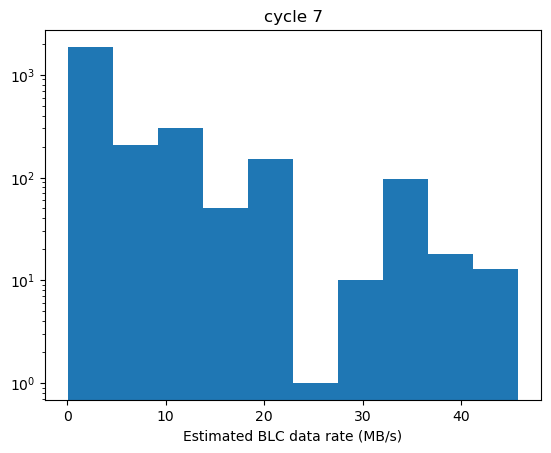

In [44]:
plt.hist(result_c7_mous['blc_datarate_typical'].to(u.MB/u.s).value)
plt.semilogy()
plt.xlabel('Estimated BLC data rate (MB/s)')
plt.title('cycle 7')

In [45]:
# maximum data rate
np.max(result_c7_mous['blc_datarate_typical'].to(u.MB/u.s))

<Quantity 45.83619048 Mbyte / s>

In [46]:
# weighted average of data rates
myweights = (result_c7_mous['time_tot']/np.sum(result_c7_mous['time_tot']))
np.average(result_c7_mous['blc_datarate_typical'], 
           weights=myweights).to(u.MB/u.s)

<Quantity 6.76831603 Mbyte / s>

Text(0.5, 1.0, 'cycle 8')

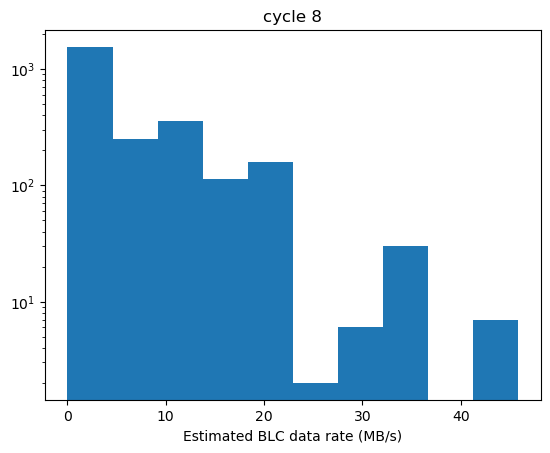

In [47]:
plt.hist(result_c8_mous['blc_datarate_typical'].to(u.MB/u.s).value)
plt.semilogy()
plt.xlabel('Estimated BLC data rate (MB/s)')
plt.title('cycle 8')

## WSU data rates

Text(0.5, 1.0, 'Early WSU -- Cycle 7')

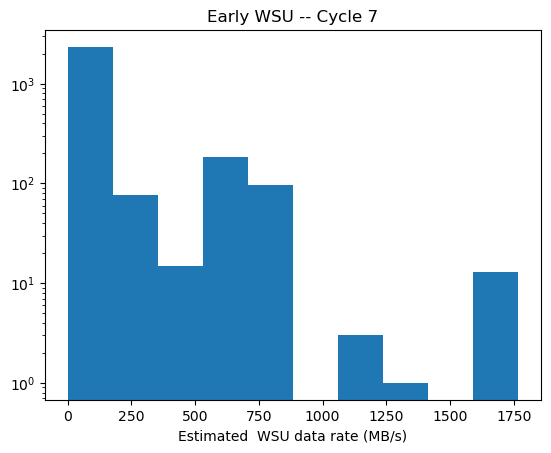

In [48]:
plt.hist(result_c7_mous['wsu_datarate_early_stepped2_typical'].to(u.MB/u.s).value)
plt.semilogy()
plt.xlabel('Estimated  WSU data rate (MB/s)')
plt.title('Early WSU -- Cycle 7')

In [49]:
# weighted average of data rates
myweights = (result_c7_mous['time_tot']/np.sum(result_c7_mous['time_tot']))
np.average(result_c7_mous['wsu_datarate_early_stepped2_typical'], 
           weights=myweights).to(u.MB/u.s)

<Quantity 132.20330509 Mbyte / s>

Text(0.5, 1.0, 'Later WSU (2x) - Cycle  7')

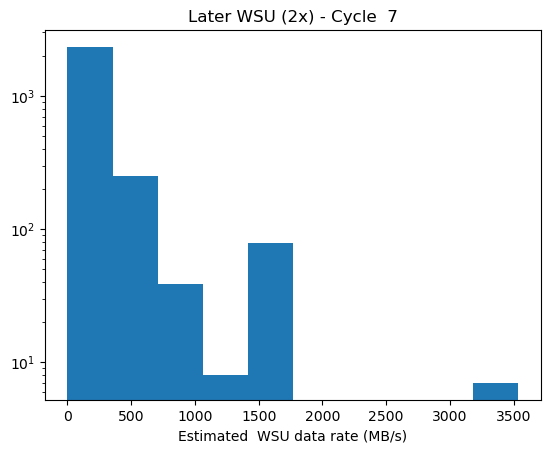

In [50]:
plt.hist(result_c7_mous['wsu_datarate_later_2x_stepped2_typical'].to(u.MB/u.s).value)
plt.semilogy()
plt.xlabel('Estimated  WSU data rate (MB/s)')
plt.title('Later WSU (2x) - Cycle  7')

In [51]:
# weighted average of data rates
myweights = (result_c7_mous['time_tot']/np.sum(result_c7_mous['time_tot']))
np.average(result_c7_mous['wsu_datarate_later_2x_stepped2_typical'], 
           weights=myweights).to(u.MB/u.s)

<Quantity 183.38885354 Mbyte / s>

Text(0.5, 1.0, 'Later WSU (4x) - Cycle 7')

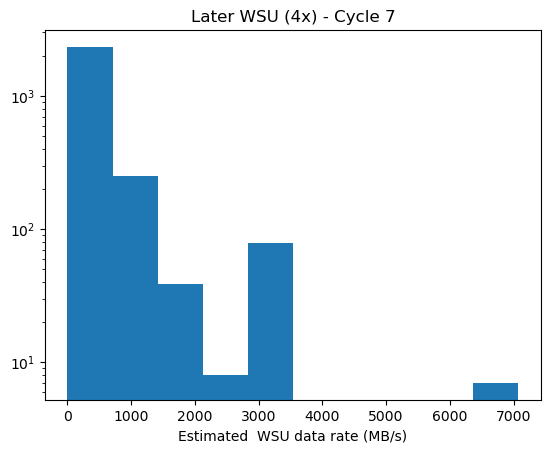

In [52]:
plt.hist(result_c7_mous['wsu_datarate_later_4x_stepped2_typical'].to(u.MB/u.s).value)
plt.semilogy()
plt.xlabel('Estimated  WSU data rate (MB/s)')
plt.title('Later WSU (4x) - Cycle 7')

In [53]:
# weighted average of data rates
myweights = (result_c7_mous['time_tot']/np.sum(result_c7_mous['time_tot']))
np.average(result_c7_mous['wsu_datarate_later_4x_stepped2_typical'], 
           weights=myweights).to(u.MB/u.s)

<Quantity 366.77770707 Mbyte / s>

Text(0.5, 1.0, 'Early WSU -- Cycle 8')

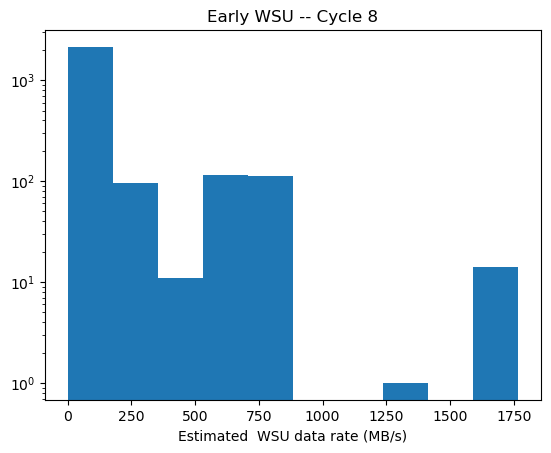

In [54]:
plt.hist(result_c8_mous['wsu_datarate_early_stepped2_typical'].to(u.MB/u.s).value)
plt.semilogy()
plt.xlabel('Estimated  WSU data rate (MB/s)')
plt.title('Early WSU -- Cycle 8')

Text(0.5, 1.0, 'Later WSU (2x) -- Cycle 8')

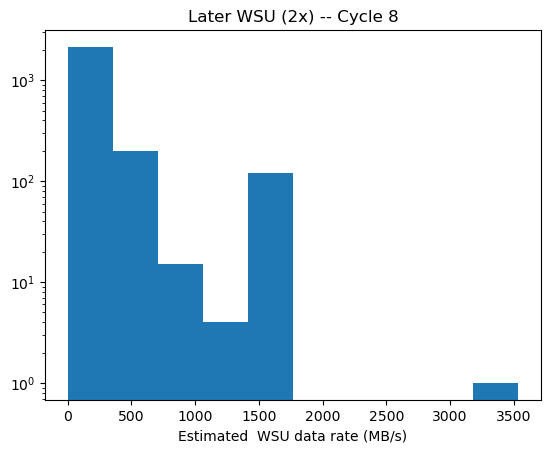

In [55]:
plt.hist(result_c8_mous['wsu_datarate_later_2x_stepped2_typical'].to(u.MB/u.s).value)
plt.semilogy()
plt.xlabel('Estimated  WSU data rate (MB/s)')
plt.title('Later WSU (2x) -- Cycle 8')

Text(0.5, 1.0, 'Later WSU (4x) -- Cycle 8')

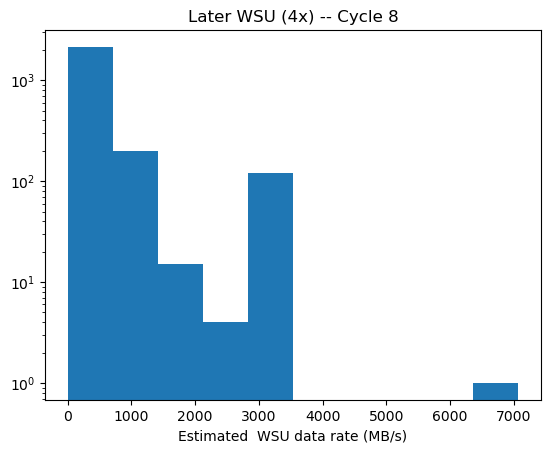

In [56]:
plt.hist(result_c8_mous['wsu_datarate_later_4x_stepped2_typical'].to(u.MB/u.s).value)
plt.semilogy()
plt.xlabel('Estimated  WSU data rate (MB/s)')
plt.title('Later WSU (4x) -- Cycle 8')

## Properties of binning

Text(0.5, 0, 'Channel Averaging factors for WSU')

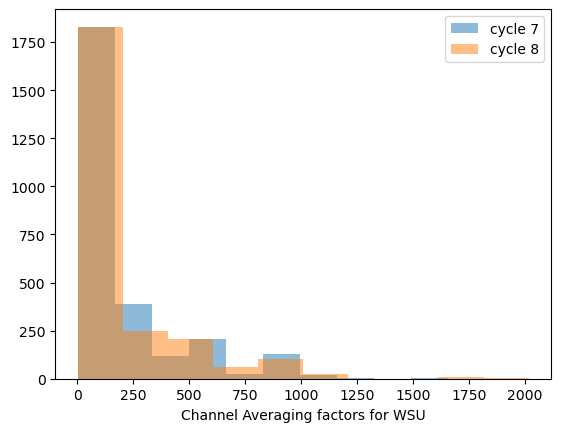

In [57]:
plt.hist(result_c7_mous['wsu_chanavg_stepped2'].value,alpha=0.5,label='cycle 7')
plt.hist(result_c8_mous['wsu_chanavg_stepped2'].value,alpha=0.5, label='cycle 8')
plt.legend()
plt.xlabel('Channel Averaging factors for WSU')

In [58]:
np.min(result_c8_mous['wsu_chanavg_stepped2'].value)

2.0

In [59]:
np.min(result_c7_mous['wsu_chanavg_stepped2'].value)

2.0

## Properties of WSU image products

In [60]:
# biggest c7 cube
np.max(result_c7_mous['wsu_cubesize_stepped2'])

<Quantity 14090.3916876 Gbyte>

In [61]:
# biggest c8 cube
np.max(result_c8_mous['wsu_cubesize_stepped2'])

<Quantity 4547.3934384 Gbyte>

C7 had long baselines and C8 didn't, so C7 has a larger max cube size

In [62]:
# biggest c7, 7m cube
idx = result_c7_mous['array'] == '7m'
np.max(result_c7_mous['wsu_cubesize_stepped2'][idx])

<Quantity 41.8131504 Gbyte>

In [63]:
# sum of all c7, 7m products in "early" WSU -- only bands 6, 8, 9, and 10 have 2x BW
np.sum(result_c7_mous['wsu_productsize_early_stepped2'][idx]).to('PB')

<Quantity 0.02814519 Pbyte>

In [64]:
# sum of all c7 wsu products in "early" WSU -- only bands 6, 8, 9, and 10 have 2x BW
np.sum(result_c7_mous['wsu_productsize_early_stepped2']).to('PB')

<Quantity 10.75331627 Pbyte>

In [65]:
# sum of all c7 wsu products in "later 2x" WSU -- all bands have 2x BW
np.sum(result_c7_mous['wsu_productsize_later_2x_stepped2']).to('PB')

<Quantity 12.27297145 Pbyte>

In [66]:
# sum of all c7 wsu products in "later 4x" WSU -- all bands have 4x BW
np.sum(result_c7_mous['wsu_productsize_later_4x_stepped2']).to('PB')

<Quantity 24.54594291 Pbyte>

In [67]:
# total number of cubes produced in "early" WSU -- only bands 6, 8, 9, and 10 have 2x BW
np.sum(result_c7_mous['wsu_nspw_early'] * result_c7_mous['ntarget'])

90110.0

In [68]:
# total number of cubes produced in "later 2x" WSU -- all bands have 2x BW
np.sum(result_c7_mous['wsu_nspw_later_2x'] * result_c7_mous['ntarget'])

115190.0

In [69]:
# total number of cubes produced today
np.sum(result_c7_mous['blc_nspw'] * result_c7_mous['ntarget'])

49429.0

## Calibration time scaling

These are actual pipeline run times so they are not available for all data. Only data that used calimage recipe is included.

In [70]:
np.unique(result_c7_mous['procedure'])

--
hifa_calimage
hifa_calimage_renorm
hifa_image


In [71]:
idx = (result_c7_mous['procedure'] == 'hifa_calimage') | (result_c7_mous['procedure'] == 'hifa_calimage_renorm')
c7_calimage = result_c7_mous[idx]

Text(0.5, 0, 'total pipeline time (h)')

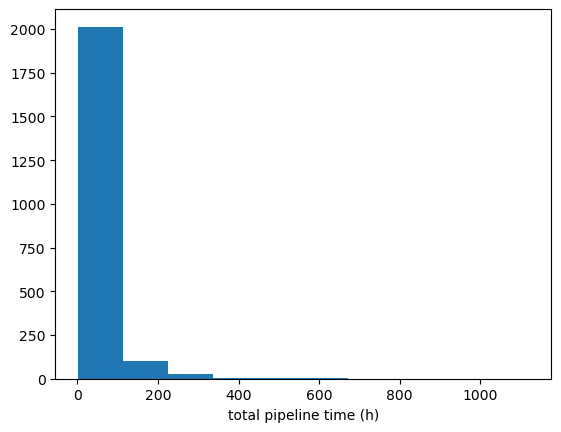

In [72]:
plt.hist(c7_calimage['pl_totaltime'].value.filled(np.nan))
plt.xlabel('total pipeline time (h)')

Text(0.5, 0, 'total imaging pipeline time (h)')

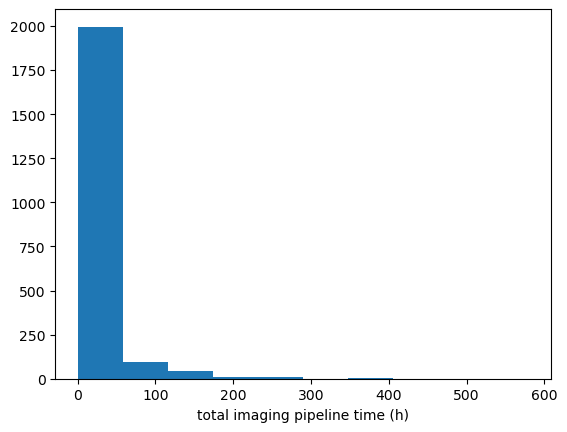

In [73]:
plt.hist(c7_calimage['pl_imgtime'].value.filled(np.nan))
plt.xlabel('total imaging pipeline time (h)')

(array([2.071e+03, 6.000e+01, 1.900e+01, 4.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.15277778e-01, 6.43357222e+01, 1.28256167e+02, 1.92176611e+02,
        2.56097056e+02, 3.20017500e+02, 3.83937944e+02, 4.47858389e+02,
        5.11778833e+02, 5.75699278e+02, 6.39619722e+02]),
 <BarContainer object of 10 artists>)

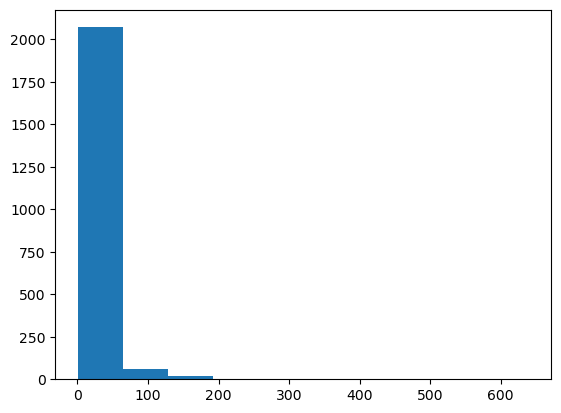

In [74]:
plt.hist(c7_calimage['pl_caltime'].value.filled(np.nan))

Text(0, 0.5, 'pl calibration time')

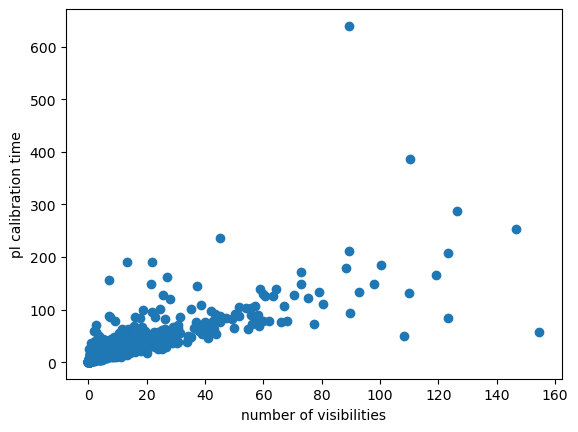

In [75]:
plt.scatter(c7_calimage['blc_nvis_typical_cal'],c7_calimage['pl_caltime'])
plt.xlabel('number of visibilities')
plt.ylabel('pl calibration time')

In [76]:
tmp = c7_calimage['pl_caltime'].value.filled(np.nan) > 500
c7_calimage['proposal_id','mous','ntarget','blc_nspw','L80','band','blc_nchan_agg','blc_nchan_max','imsize','mitigated','initialprodsize','mitigatedprodsize','pl_totaltime','pl_imgtime'][tmp]

proposal_id,mous,ntarget,blc_nspw,L80,band,blc_nchan_agg,blc_nchan_max,imsize,mitigated,initialprodsize,mitigatedprodsize,pl_totaltime,pl_imgtime
,,,,m,,,,,,Gbyte,Gbyte,h,h
str14,str22,float64,int64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64
2019.1.00419.S,uid://A001/X1528/X313,1.0,4,1503.8549,6.0,7680.0,1920.0,2160.0,True,619.0,77.8,1120.4316666666668,480.81194444444446


Text(0, 0.5, 'pl calibration time')

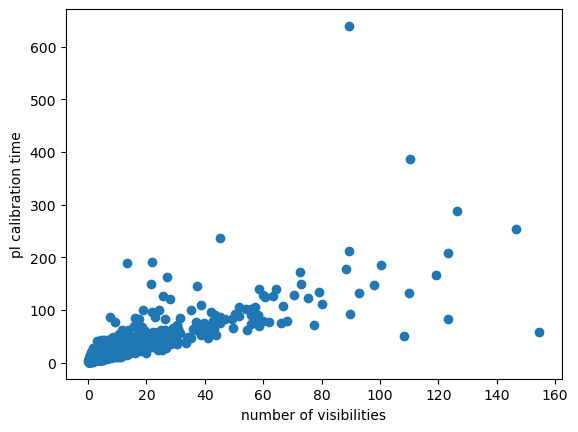

In [77]:
idx = c7_calimage['array'] == '12m'
plt.scatter(c7_calimage['blc_nvis_typical_cal'][idx],c7_calimage['pl_caltime'][idx])
plt.xlabel('number of visibilities')
plt.ylabel('pl calibration time')

Text(0, 0.5, 'pl calibration time')

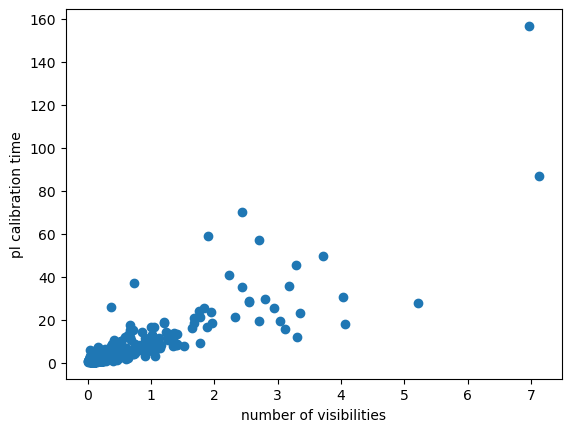

In [78]:
idx = c7_calimage['array'] == '7m'
plt.scatter(c7_calimage['blc_nvis_typical_cal'][idx],c7_calimage['pl_caltime'][idx])
plt.xlabel('number of visibilities')
plt.ylabel('pl calibration time')